In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd 

In [3]:
X=pd.read_csv('heart_rate_non_linear_features_test.csv')

In [4]:
y=pd.read_csv('frequency_domain_features_test.csv')

In [5]:
np.random.seed(42)

In [6]:
 X.head(100)

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,8.347898,115.862444,2.209659,1.100715,2,time pressure
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,14.542096,77.118903,2.186132,1.290615,2,no stress
2,cb573d3a-c767-4556-b32e-ad8c08ded214,9.799336,125.044377,2.051571,1.226663,2,no stress
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,11.639185,302.029812,2.080910,1.085143,2,time pressure
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,7.266567,72.579248,2.068728,1.252547,2,interruption
...,...,...,...,...,...,...,...
95,00bf0752-ba20-4c4a-b03f-4d431ea8da08,15.001698,129.802846,2.212078,1.143898,2,no stress
96,a78a2e06-2296-4253-9c02-804d4ff3b8ce,15.942867,110.009683,2.199867,1.235652,2,interruption
97,20ed0520-1158-4288-9e98-16a843818968,8.258946,111.464222,2.148049,1.144720,2,no stress
98,84b42ee8-acb8-4903-9490-1797ca180c2b,9.906696,148.020950,1.764142,1.194425,2,no stress


In [7]:
happy_heart_rate = np.random.normal(80, 5, size=(7))

In [8]:
sad_heart_rate = np.random.normal(60, 5, size=(7))

In [9]:
mood_to_numeric = {"happy": 0, "sad": 1, "calm": 2, "stressed": 3}
y_numeric = np.array(100)

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd 

In [28]:
df=pd.read_csv('mitbih_test.csv')

In [15]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [29]:
df.head()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
import seaborn as sns

In [18]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [19]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [20]:
num_samples = 1000

In [30]:
df.dataframeName = 'mitbih_test.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 21891 rows and 188 columns


In [22]:
happy_heart_rate = np.random.normal(80, 5, size=(num_samples, 7))

In [23]:
sad_heart_rate = np.random.normal(60, 5, size=(num_samples, 7))

In [24]:
X = np.vstack((happy_heart_rate, sad_heart_rate))
y = np.array(["happy"] * num_samples + ["sad"] * num_samples)

In [25]:
mood_to_numeric = {"happy": 0, "sad": 1}
y_numeric = np.array([mood_to_numeric[mood] for mood in y])

C:\Users\chstrinaevangline\AppData\Local\Temp\ipykernel_14548\2970181590.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


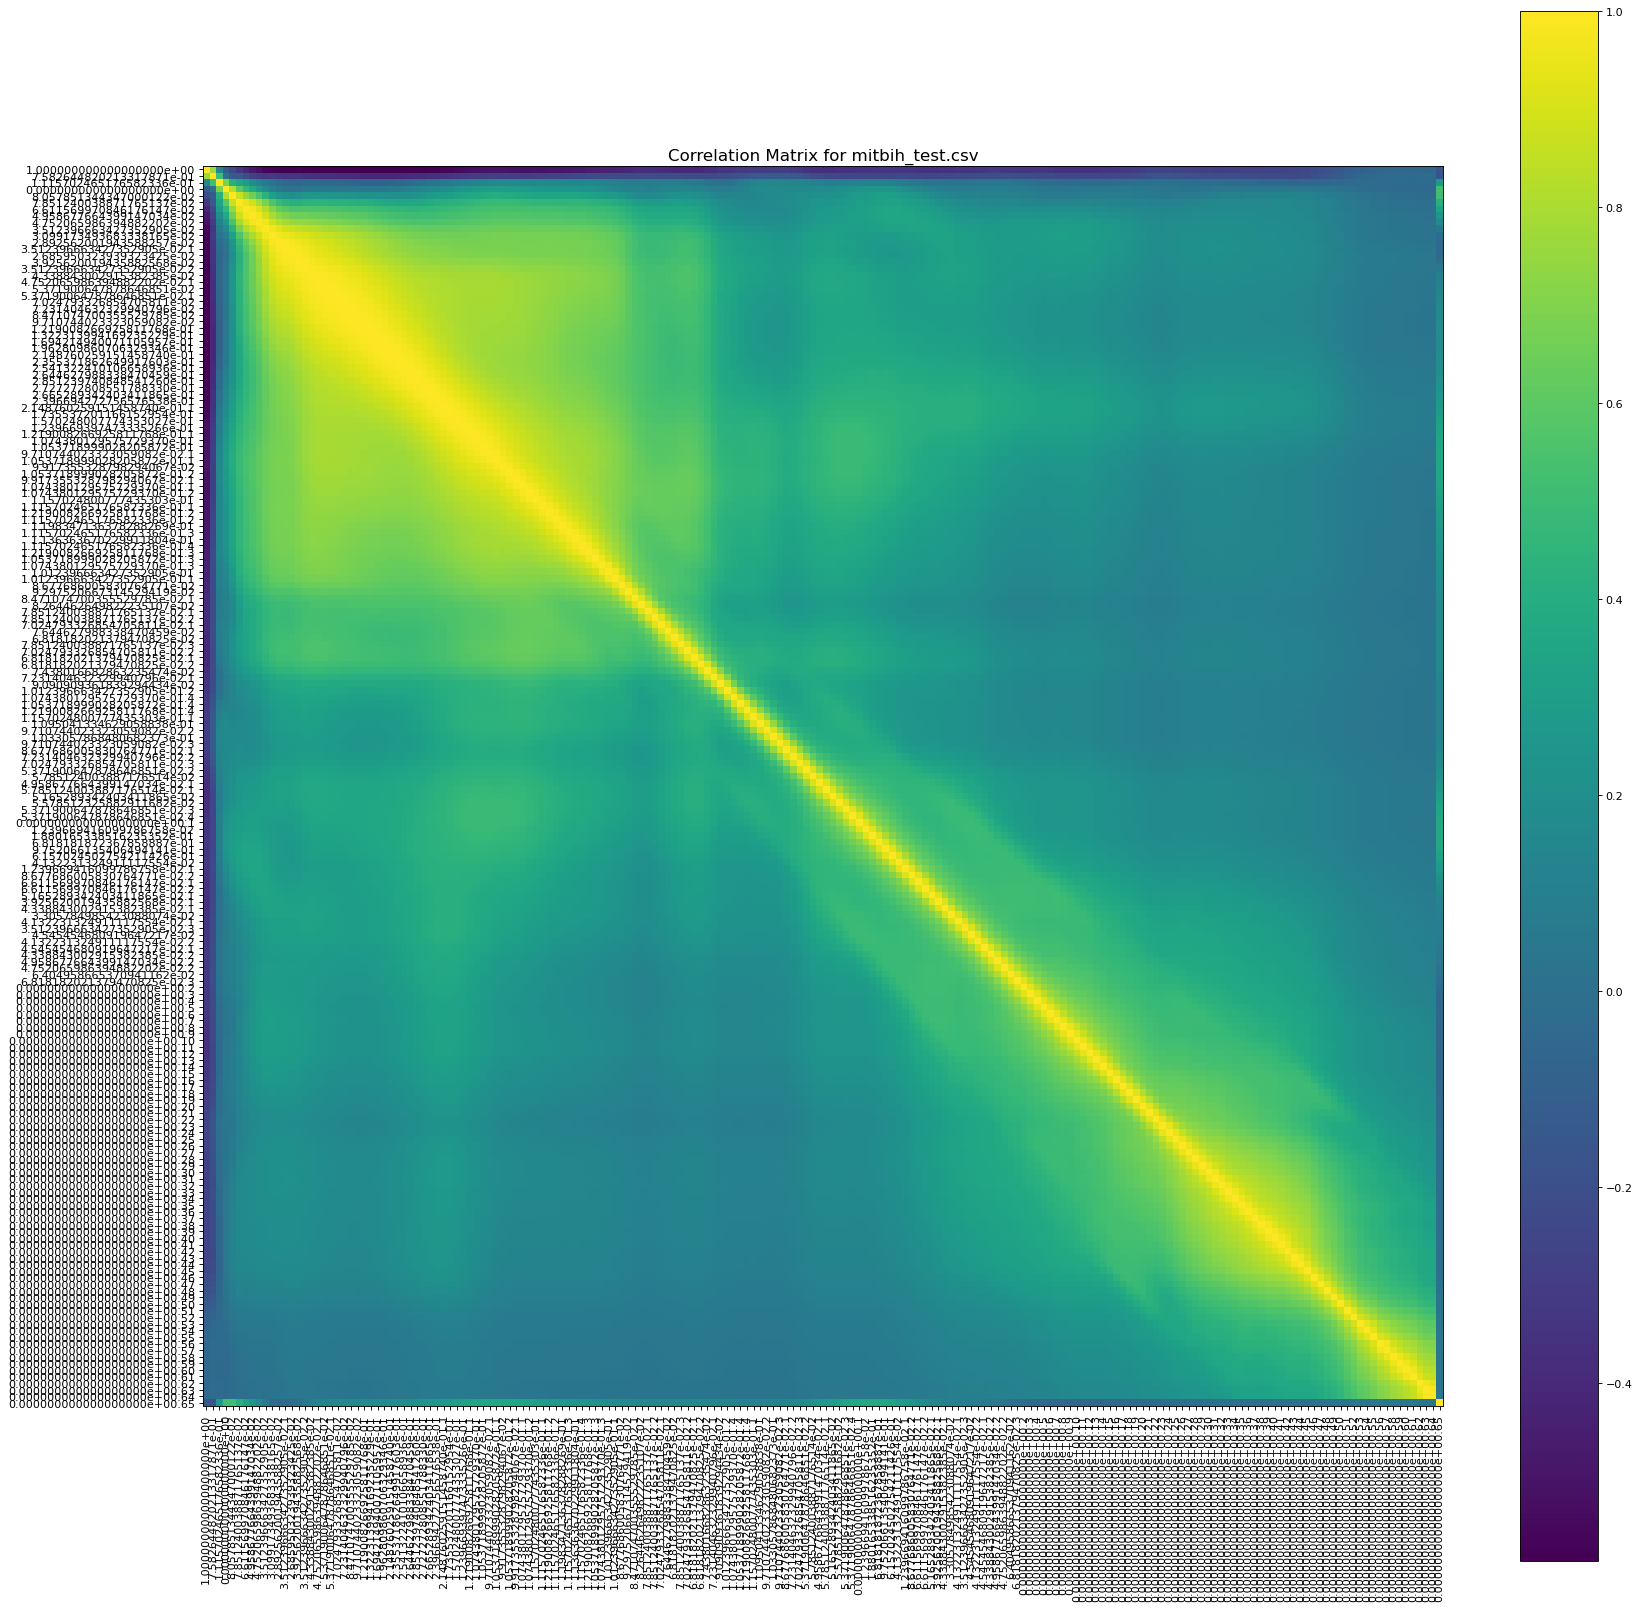

In [32]:
plotCorrelationMatrix(df, 25)

C:\Users\chstrinaevangline\AppData\Local\Temp\ipykernel_14548\844214064.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


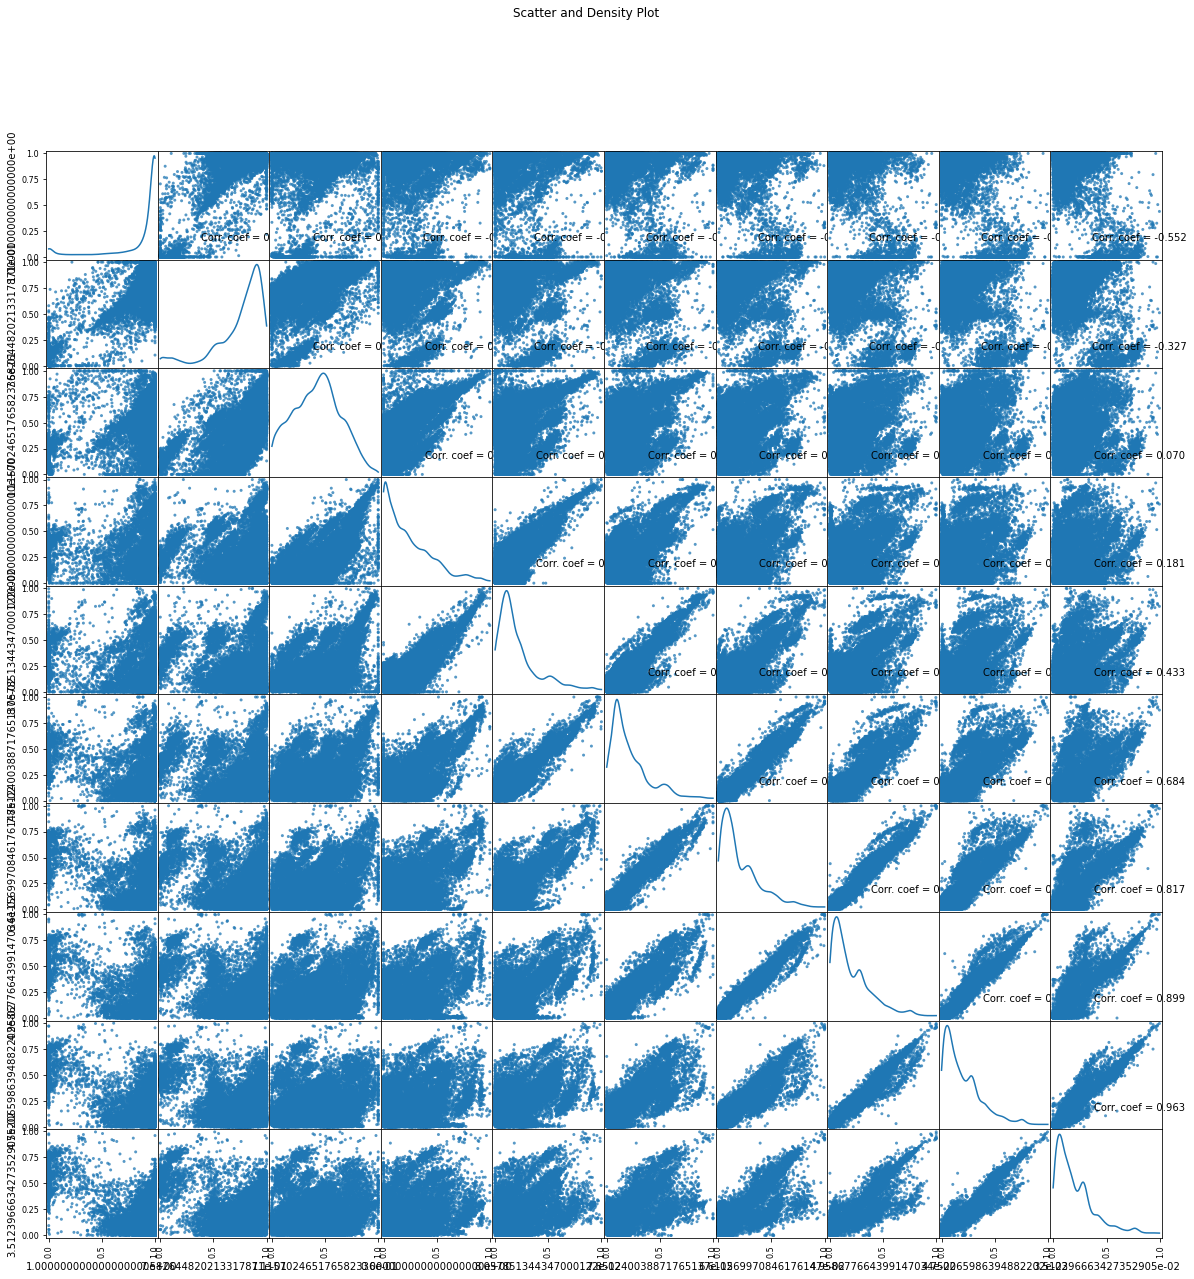

In [31]:
plotScatterMatrix(df, 20, 10)